## Foaming workflow
### Zhihua Qi
### Mar 2019

## Stacked ROIs from each well, each timepoint  into tiled curve.
- to enable the simultaneous visualization of many sets of these time-lapse images at once, we cropped a small region of interest (ROI) from within each of the four wells. We then horizontally concatenated, or ‘stacked,’ the cropped ROIs from each timepoint for each condition. 

In [1]:
# import all the required modules
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

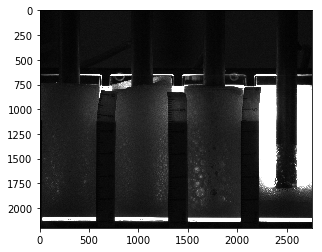

In [2]:
# display one picture to see what does the data look like.
template = cv2.imread('../examples/2019_01_17_12_24_56_Camera_1_1/01-17_12.25.54_Camera1Image10.bmp')
plt.imshow(template)
plt.show()

## Processing one examples with four tubes
- For all the data generated on Randy, one experiment usually has eight tubes while the results will be seperated into two folder.
- Here we only process one folder which includes the results of four tubes.

In [3]:
dir = "../examples/2019_01_17_12_24_56_Camera_1_1//" # img directory
ext = ".bmp" # whatever extension you want

pathname = os.path.join(dir, "*" + ext)
files = glob.glob(pathname)
files.sort(key=os.path.getmtime)
images = [cv2.imread(img) for img in files]

In [4]:
# the number of scans
len(images)
# make directory tmp
! mkdir ../tmp/

In [5]:
# the name of the four tubes are sampleX based on the order.
sample1=[]
sample2=[]
sample3=[]
sample4=[]
for image in images:
    tmp1 = image[750:1900,80:180]
    tmp2 = image[750:1900,800:900]
    tmp3 = image[750:1900,1550:1650]
    tmp4 = image[750:1900,2250:2350]
    sample1.append(tmp1)
    sample2.append(tmp2)
    sample3.append(tmp3)
    sample4.append(tmp4)

In [6]:
list = [sample1, sample2, sample3, sample4]

In [7]:
# save the tiled images
n = 1
for sample in list:
    outfile_name = '../tmp/sample'+ str(n) +'.bmp'
    height = max(image.shape[0] for image in sample)
    width = sum(image.shape[1] for image in sample)
    output = np.zeros((height,width,3))
    
    y = 0
    for image in sample:
        h,w,d = image.shape
        output[0:h,y:y+w] = image
        y += w
    
    cv2.imwrite(outfile_name, output)
    n += 1

## Display the tiled signals

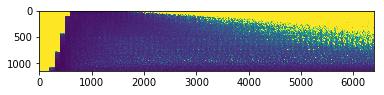

In [8]:
sample1 = cv2.imread('../tmp/sample1.bmp',0)
plt.imshow(sample1)
plt.show()

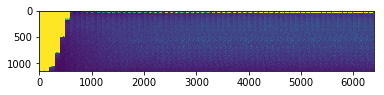

In [9]:
sample2 = cv2.imread('../tmp/sample2.bmp', 0)
plt.imshow(sample2)
plt.show()

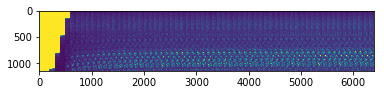

In [10]:
sample3 = cv2.imread('../tmp/sample3.bmp',0)
plt.imshow(sample3)
plt.show()

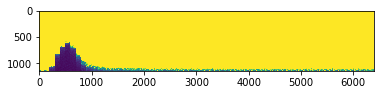

In [11]:
sample4 = cv2.imread('../tmp/sample4.bmp',0)
plt.imshow(sample4)
plt.show()

## Image simple threshold

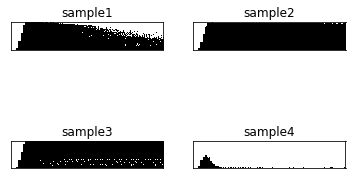

In [12]:
ret,thresh1 = cv2.threshold(sample1,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(sample2,127,255,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(sample3,127,255,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(sample4,127,255,cv2.THRESH_BINARY)


titles = ['sample1','sample2','sample3','sample4']
images = [thresh1, thresh2, thresh3, thresh4]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [13]:
cv2.imwrite('../tmp/tmp1.bmp', thresh1)
cv2.imwrite('../tmp/tmp2.bmp', thresh2)
cv2.imwrite('../tmp/tmp3.bmp', thresh3)
cv2.imwrite('../tmp/tmp4.bmp', thresh4)


True

## Extract features from image signals
- the maximun height of the foam
- the speed of foam disappearance

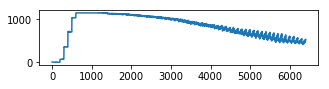

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as img

gray1 = img.open('../tmp/tmp1.bmp').convert('L')
bw1 = gray1.point(lambda x: 0 if x<240 else 255, '1')
bw1 = bw1.convert('1')
pix1 = np.array(bw1)
(n1,m1) = pix1.shape
curve1 = np.zeros(m1)
for j in range(m1):
    for i in range(n1):
        if pix1[i,j] != 1:
            curve1[j] += 1
plt.figure(figsize=(5,1))
plt.plot(curve1)
plt.show()

In [15]:
# the maximun height of the foam in sample1
curve1 = curve1.tolist()
maximum_height1, max_index1 = max(curve1), curve1.index(max(curve1))
print("maximum foam height of sample 1 is {}.".format(maximum_height1))

maximum foam height of sample 1 is 1150.0.


In [16]:
# the speed of disappearance in sample 1
speed_of_change1 = (maximum_height1 - curve1[-1])/((len(curve1)-1)-max_index1)
print("the speed of foam disappearance in sample 1 is {}.".format(speed_of_change1))

the speed of foam disappearance in sample 1 is 0.10622521124331781.


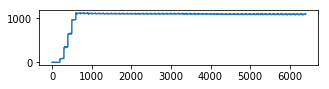

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as img

gray2 = img.open('../tmp/tmp2.bmp').convert('L')
bw2 = gray2.point(lambda x: 0 if x<240 else 255, '1')
bw2 = bw2.convert('1')
pix2 = np.array(bw2)
(n2,m2) = pix2.shape
curve2 = np.zeros(m2)
for j in range(m2):
    for i in range(n2):
        if pix2[i,j] != 1:
            curve2[j] += 1
plt.figure(figsize=(5,1))
plt.plot(curve2)
plt.show()

In [18]:
# the maximun height of the foam in sample2
curve2 = curve2.tolist()
maximum_height2, max_index2 = max(curve2), curve2.index(max(curve2))
print("maximum foam height of sample 2 is {}.".format(maximum_height2))

maximum foam height of sample 2 is 1125.0.


In [19]:
# the speed of disappearance in sample 2
speed_of_change2 = (maximum_height2 - curve2[-1])/((len(curve2)-1)-max_index2)
print("the speed of foam disappearance in sample 2 is {}.".format(speed_of_change2))

the speed of foam disappearance in sample 2 is 0.003277557357253752.


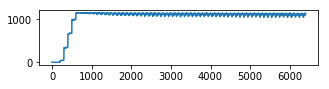

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as img

gray3 = img.open('../tmp/tmp3.bmp').convert('L')
bw3 = gray3.point(lambda x: 0 if x<240 else 255, '1')
bw3 = bw3.convert('1')
pix3 = np.array(bw3)
(n3,m3) = pix3.shape
curve3 = np.zeros(m3)
for j in range(m3):
    for i in range(n3):
        if pix3[i,j] != 1:
            curve3[j] += 1
plt.figure(figsize=(5,1))
plt.plot(curve3)
plt.show()

In [21]:
# the maximun height of the foam in sample3
curve3 = curve3.tolist()
maximum_height3, max_index3 = max(curve3), curve3.index(max(curve3))
print("maximum foam height of sample 3 is {}.".format(maximum_height3))

maximum foam height of sample 3 is 1150.0.


In [22]:
# the speed of disappearance in sample 3
speed_of_change3 = (maximum_height3 - curve3[-1])/((len(curve3)-1)-max_index3)
print("the speed of foam disappearance in sample 3 is {}.".format(speed_of_change3))

the speed of foam disappearance in sample 3 is 0.002072896873380549.


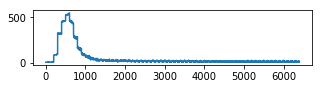

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as img

gray4 = img.open('../tmp/tmp4.bmp').convert('L')
bw4 = gray4.point(lambda x: 0 if x<240 else 255, '1')
bw4 = bw4.convert('1')
pix4 = np.array(bw4)
(n4,m4) = pix4.shape
curve4 = np.zeros(m4)
for j in range(m4):
    for i in range(n4):
        if pix4[i,j] != 1:
            curve4[j] += 1
plt.figure(figsize=(5,1))
plt.plot(curve4)
plt.show()

In [24]:
# the maximun height of the foam in sample4
curve4 = curve4.tolist()
maximum_height4, max_index4 = max(curve4), curve4.index(max(curve4))
print("maximum foam height of sample 4 is {}.".format(maximum_height4))

maximum foam height of sample 4 is 550.0.


In [25]:
# the speed of disappearance in sample 4
speed_of_change4 = (maximum_height4 - curve4[-1])/((len(curve4)-1)-max_index4)
print("the speed of foam disappearance in sample 4 is {}.".format(speed_of_change4))

the speed of foam disappearance in sample 4 is 0.09303928325292901.


In [29]:
! rm -rf ../tmp/

### Summary of results

In [27]:
print("maximum foam height of sample 1 is {}.".format(maximum_height1))
print("maximum foam height of sample 2 is {}.".format(maximum_height2))
print("maximum foam height of sample 3 is {}.".format(maximum_height3))
print("maximum foam height of sample 4 is {}.".format(maximum_height4))
print("the speed of foam disappearance in sample 1 is {}.".format(speed_of_change1))
print("the speed of foam disappearance in sample 2 is {}.".format(speed_of_change2))
print("the speed of foam disappearance in sample 3 is {}.".format(speed_of_change3))
print("the speed of foam disappearance in sample 4 is {}.".format(speed_of_change4))

maximum foam height of sample 1 is 1150.0.
maximum foam height of sample 2 is 1125.0.
maximum foam height of sample 3 is 1150.0.
maximum foam height of sample 4 is 550.0.
the speed of foam disappearance in sample 1 is 0.10622521124331781.
the speed of foam disappearance in sample 2 is 0.003277557357253752.
the speed of foam disappearance in sample 3 is 0.002072896873380549.
the speed of foam disappearance in sample 4 is 0.09303928325292901.
